In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset 
df = pd.read_csv("Walmart_clean_data.csv")

print("Rows, cols:", df.shape)
display(df.head())

Rows, cols: (9969, 12)


,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


# Histogram of Total Sales

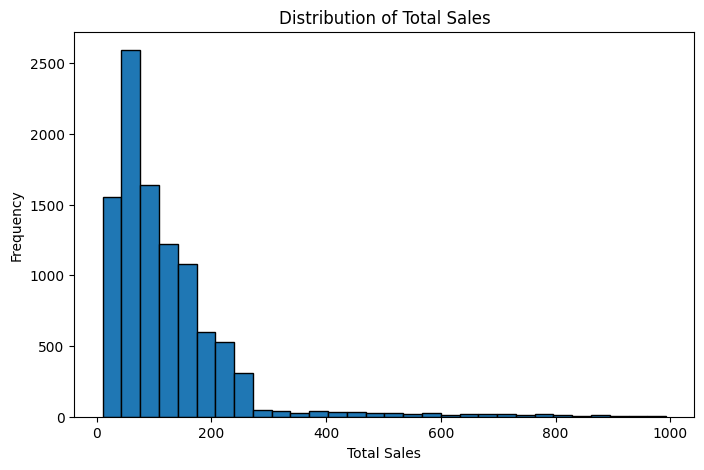

In [4]:
plt.figure(figsize=(8,5))
plt.hist(df['Total'], bins=30, edgecolor='black')
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Total Sales")
plt.show()


# Bar Chart – Average Rating by Category

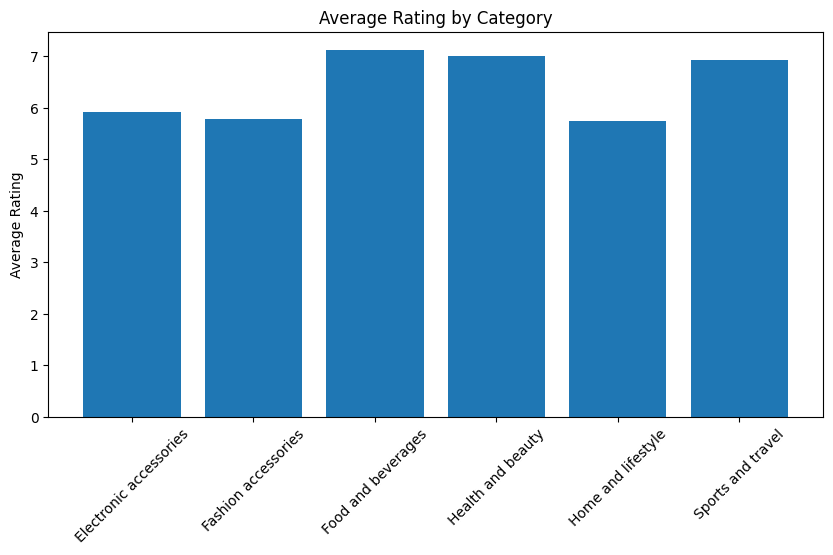

In [15]:
cat_rating = df.groupby('category')['rating'].mean()

plt.figure(figsize=(10,5))
plt.bar(cat_rating.index, cat_rating.values)
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.title("Average Rating by Category")
plt.show()


# Line Plot – Daily Total Sales

/var/folders/0p/kp5m7pbx4n51fn7c4grxld8r0000gn/T/ipykernel_66553/2224072245.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True)


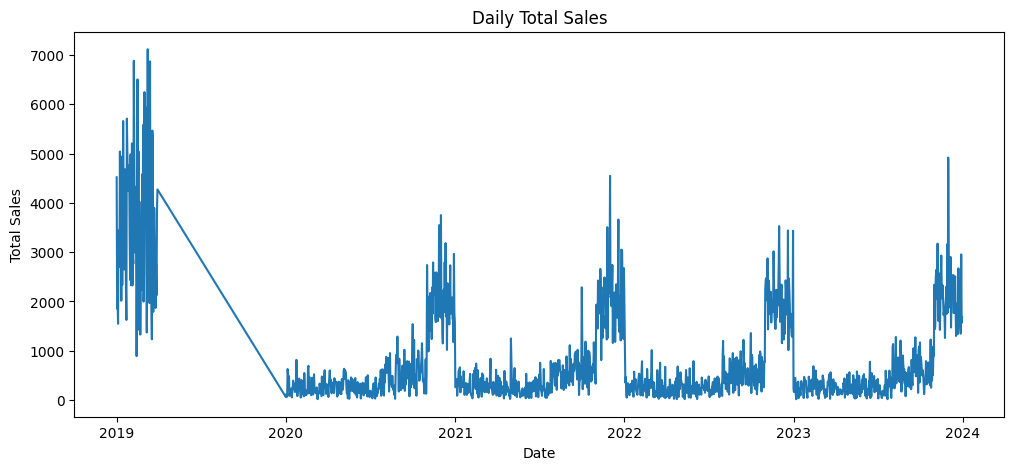

In [7]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
daily_sales = df.groupby('date')['Total'].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Total Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


# Pie Chart – Quantity Sold by Category

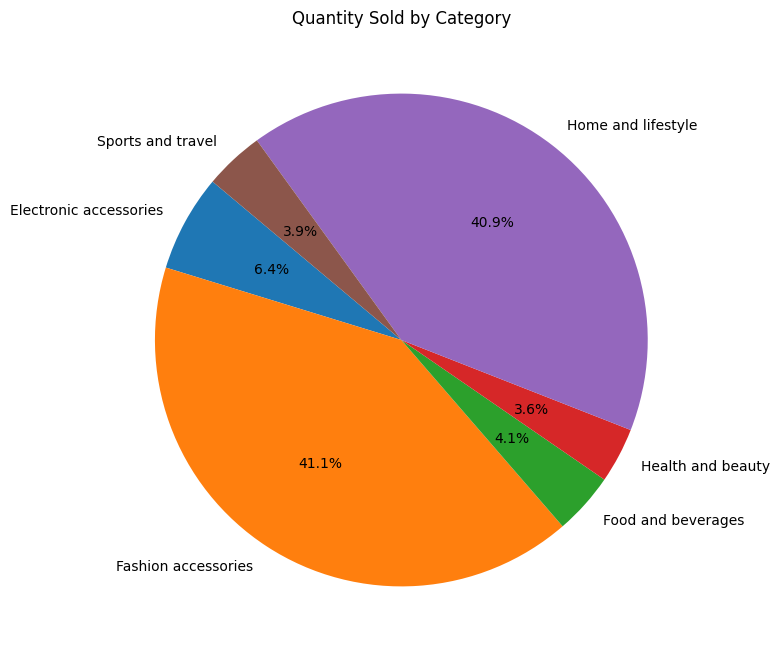

In [8]:
qty_by_category = df.groupby('category')['quantity'].sum()

plt.figure(figsize=(8,8))
plt.pie(qty_by_category, labels=qty_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title("Quantity Sold by Category")
plt.show()


# Pie Chart – Payment Method Distribution

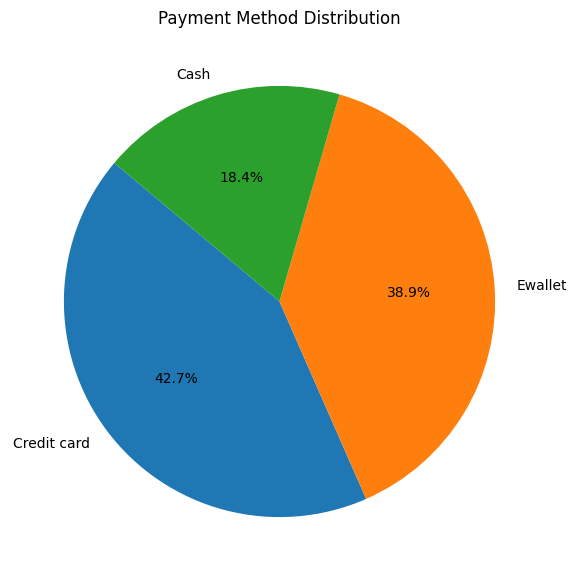

In [10]:
payment_counts = df['payment_method'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Payment Method Distribution")
plt.show()


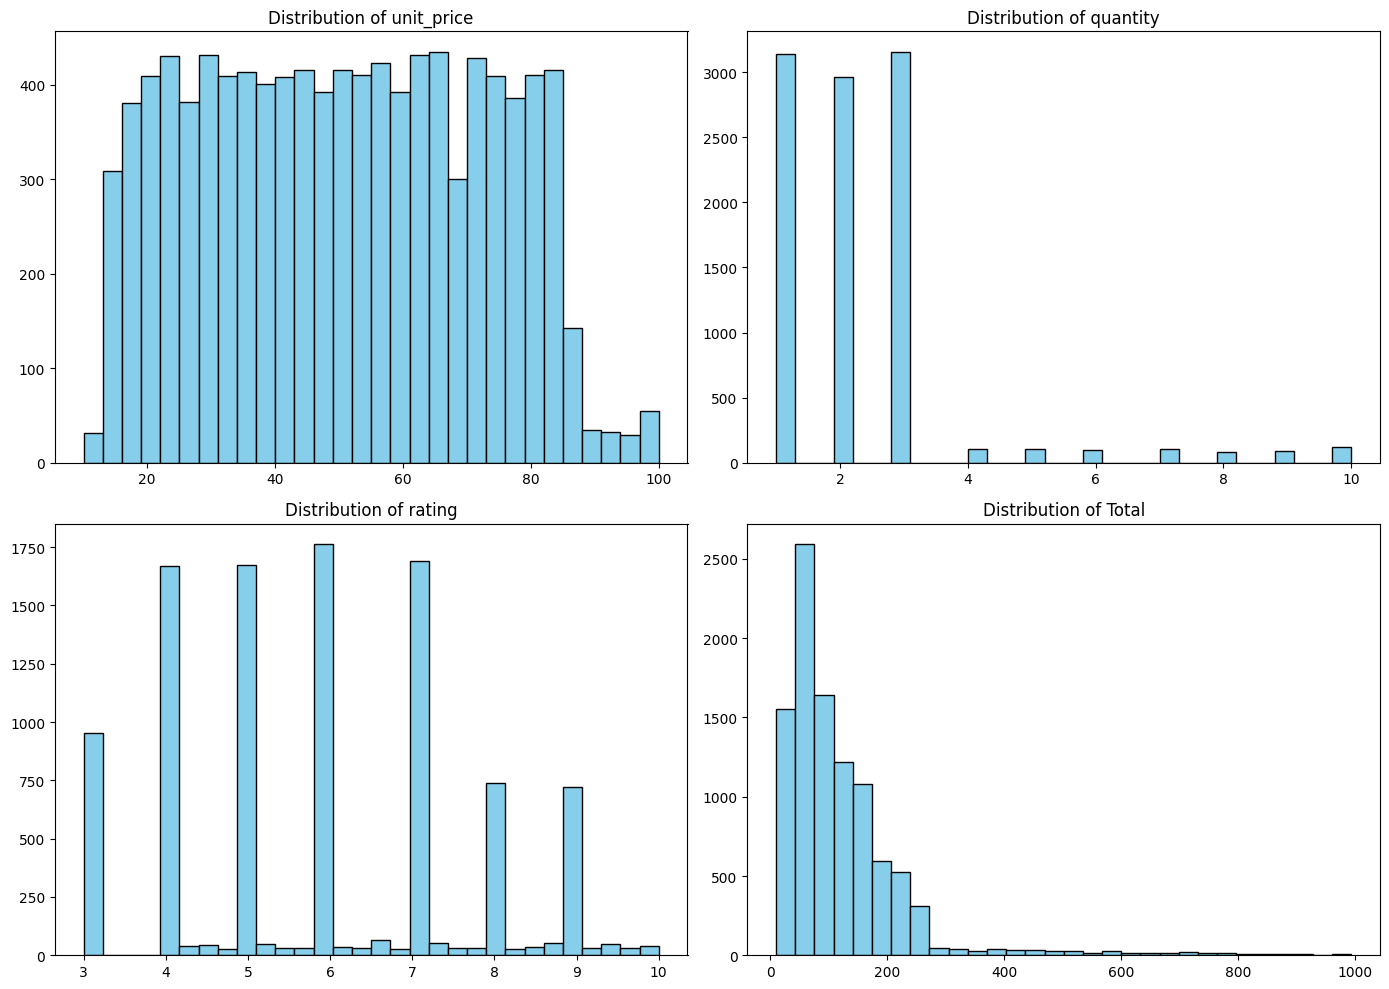

In [16]:
numerical_cols = ['unit_price', 'quantity', 'rating', 'Total']

plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


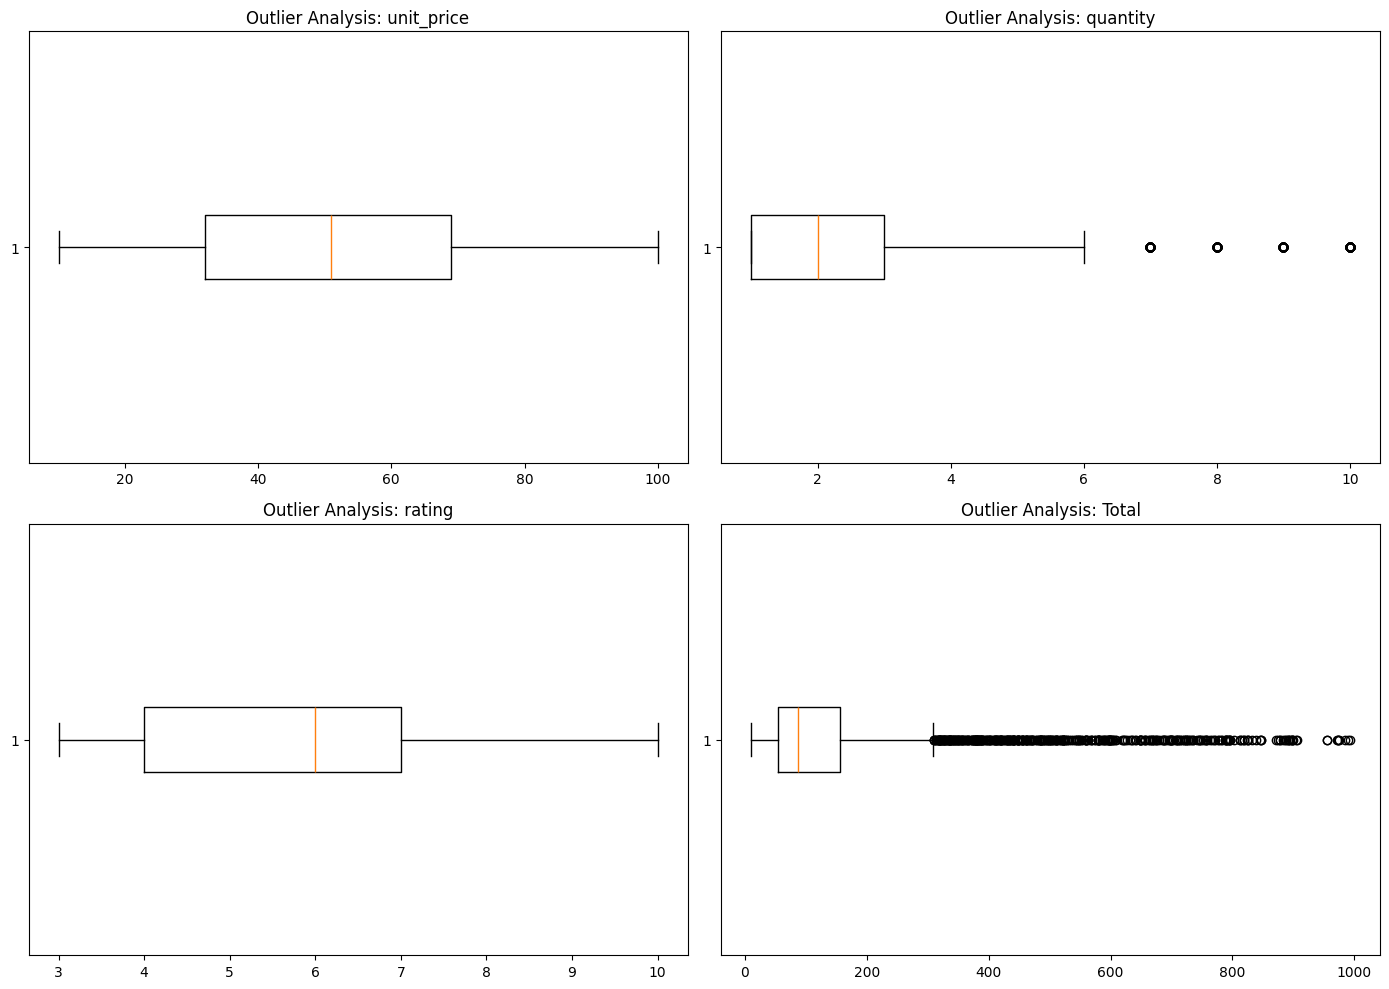

In [17]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Outlier Analysis: {col}')
plt.tight_layout()
plt.show()
